In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('C:/Users/lenovo/Downloads/Instagram_Reach_Analysis_data.csv', encoding='ISO-8859-1')


In [4]:
df.head(2)

,Username,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,user12345,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#financeÂ #moneyÂ #businessÂ #investingÂ #inve...
1,fashionista_99,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcareÂ #healthÂ #covidÂ #dataÂ #datascie...


In [5]:
df.columns

Index(['Username', 'Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Username        119 non-null    object
 1   Impressions     119 non-null    int64 
 2   From Home       119 non-null    int64 
 3   From Hashtags   119 non-null    int64 
 4   From Explore    119 non-null    int64 
 5   From Other      119 non-null    int64 
 6   Saves           119 non-null    int64 
 7   Comments        119 non-null    int64 
 8   Shares          119 non-null    int64 
 9   Likes           119 non-null    int64 
 10  Profile Visits  119 non-null    int64 
 11  Follows         119 non-null    int64 
 12  Caption         119 non-null    object
 13  Hashtags        119 non-null    object
dtypes: int64(11), object(3)
memory usage: 13.1+ KB


In [7]:
df.isna().sum()

Username          0
Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [8]:
df.nunique()

Username          119
Impressions       101
From Home          97
From Hashtags     100
From Explore       95
From Other         84
Saves              84
Comments           15
Shares             28
Likes              85
Profile Visits     59
Follows            29
Caption            90
Hashtags           54
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Impressions,119.0,5703.991597,4843.780105,1941.0,3467.0,4289.0,6138.0,36919.0
From Home,119.0,2475.789916,1489.386348,1133.0,1945.0,2207.0,2602.5,13473.0
From Hashtags,119.0,1887.512605,1884.361443,116.0,726.0,1278.0,2363.5,11817.0
From Explore,119.0,1078.100840,2613.026132,0.0,157.5,326.0,689.5,17414.0
From Other,119.0,171.092437,289.431031,9.0,38.0,74.0,196.0,2547.0
Saves,119.0,153.310924,156.317731,22.0,65.0,109.0,169.0,1095.0
Comments,119.0,6.663866,3.544576,0.0,4.0,6.0,8.0,19.0
Shares,119.0,9.361345,10.089205,0.0,3.0,6.0,13.5,75.0
Likes,119.0,173.781513,82.378947,72.0,121.5,151.0,204.0,549.0
Profile Visits,119.0,50.621849,87.088402,4.0,15.0,23.0,42.0,611.0


In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print(correlation_matrix)


                Impressions  From Home  From Hashtags  From Explore  \
Impressions        1.000000   0.844698       0.560760      0.893607   
From Home          0.844698   1.000000       0.177516      0.800573   
From Hashtags      0.560760   0.177516       1.000000      0.190453   
From Explore       0.893607   0.800573       0.190453      1.000000   
From Other         0.592960   0.555666       0.229623      0.495685   
Saves              0.779231   0.768817       0.305929      0.747803   
Comments          -0.028524   0.012716       0.161439     -0.158565   
Shares             0.634675   0.674985       0.219511      0.615731   
Likes              0.849835   0.698330       0.662124      0.653699   
Profile Visits     0.760981   0.531076       0.691345      0.531850   
Follows            0.889363   0.672675       0.555485      0.796019   

                From Other     Saves  Comments    Shares     Likes  \
Impressions       0.592960  0.779231 -0.028524  0.634675  0.849835   
From Ho

In [11]:
df.corr

<bound method DataFrame.corr of                  Username  Impressions  From Home  From Hashtags  \
0               user12345         3920       2586           1028   
1          fashionista_99         5394       2727           1838   
2          traveljunkie88         4021       2085           1188   
3             foodie_life         4528       2700            621   
4           fitness_freak         2518       1704            255   
..                    ...          ...        ...            ...   
114  creative_expressions        13700       5185           3041   
115    fitness_motivation         5731       1923           1368   
116         nature_escape         4139       1133           1538   
117        adventure_time        32695      11815           3147   
118        style_explorer        36919      13473           4176   

     From Explore  From Other  Saves  Comments  Shares  Likes  Profile Visits  \
0             619          56     98         9       5    162         

In [12]:
# Derive the "Engagement Rate" feature
df['Engagement Rate'] = (df['Likes'] + df['Comments'] + df['Shares']) / df['Impressions']

# Print the updated DataFrame
print(df.head())

         Username  Impressions  From Home  From Hashtags  From Explore  \
0       user12345         3920       2586           1028           619   
1  fashionista_99         5394       2727           1838          1174   
2  traveljunkie88         4021       2085           1188             0   
3     foodie_life         4528       2700            621           932   
4   fitness_freak         2518       1704            255           279   

   From Other  Saves  Comments  Shares  Likes  Profile Visits  Follows  \
0          56     98         9       5    162              35        2   
1          78    194         7      14    224              48       10   
2         533     41        11       1    131              62       12   
3          73    172        10       7    213              23        8   
4          37     96         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...  

In [13]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Username,user12345,fashionista_99,traveljunkie88,foodie_life,fitness_freak,musiclover_22,tech_guru,photography_king,artsy_vibes,nature_lover
Impressions,3920,5394,4021,4528,2518,3884,2621,3541,3749,4115
From Home,2586,2727,2085,2700,1704,2046,1543,2071,2384,2609
From Hashtags,1028,1838,1188,621,255,1214,599,628,857,1104
From Explore,619,1174,0,932,279,329,333,500,248,178
From Other,56,78,533,73,37,43,25,60,49,46
Saves,98,194,41,172,96,74,22,135,155,122
Comments,9,7,11,10,5,7,5,4,6,6
Shares,5,14,1,7,4,10,1,9,8,3
Likes,162,224,131,213,123,144,76,124,159,191


In [14]:
df.columns

Index(['Username', 'Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Engagement Rate'],
      dtype='object')

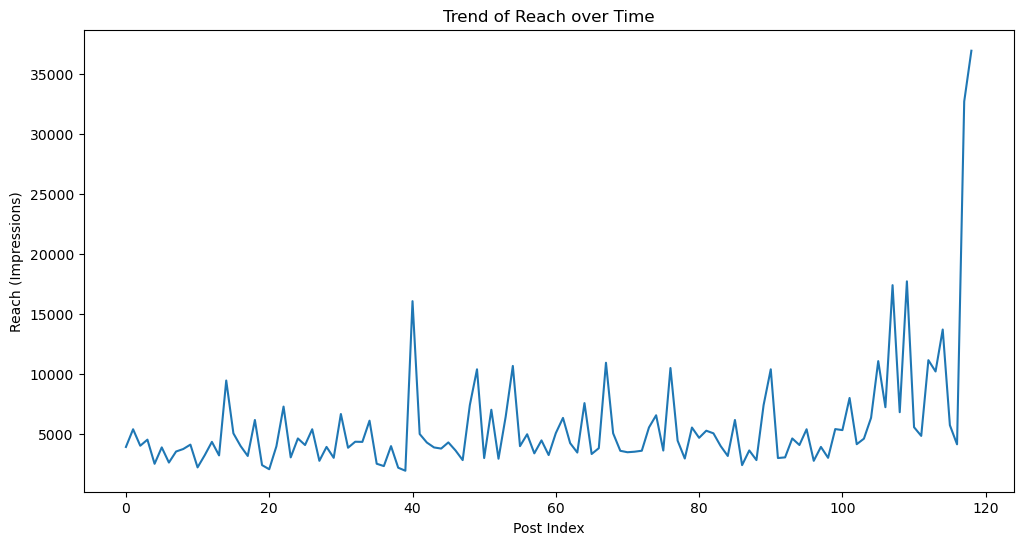

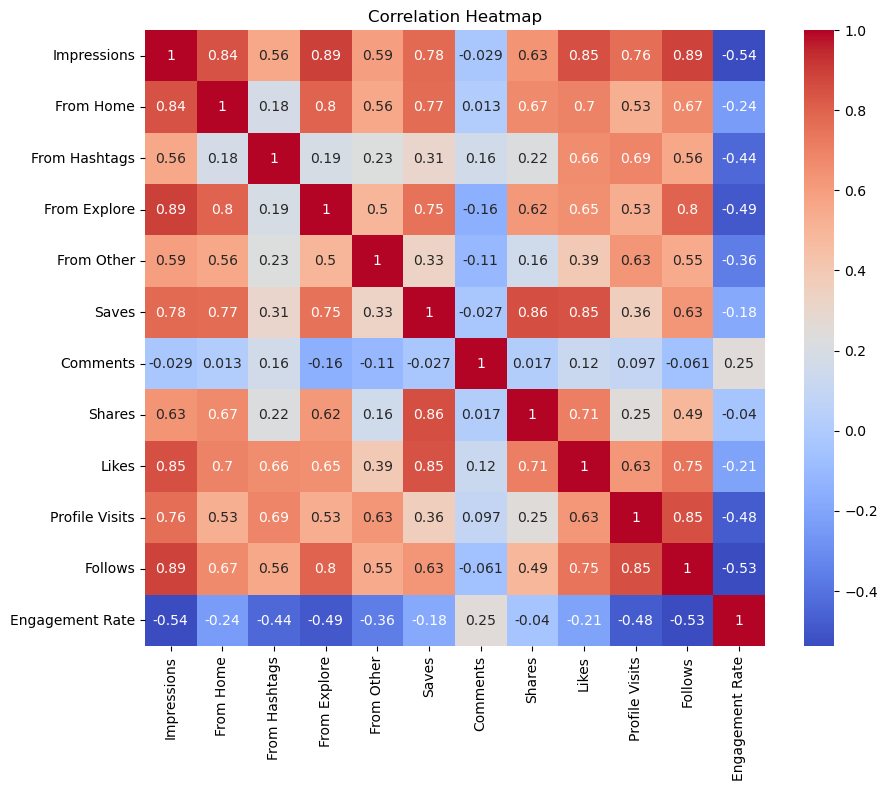

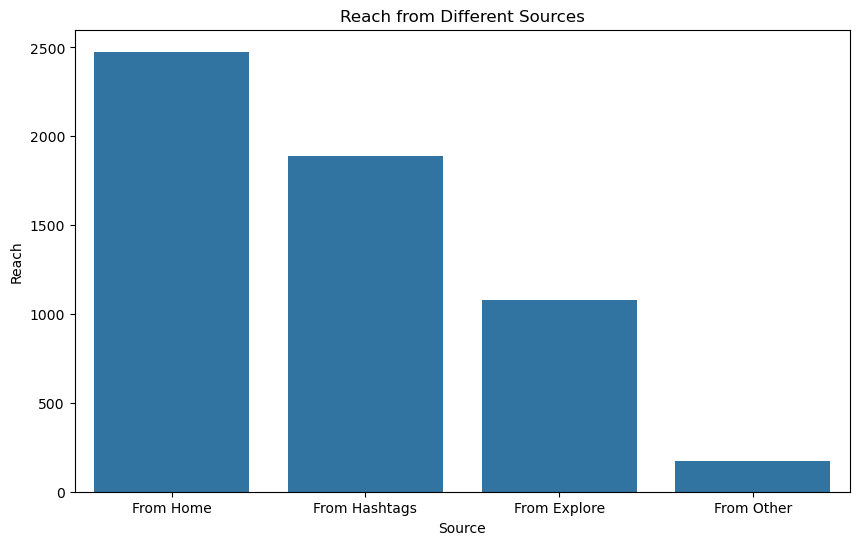

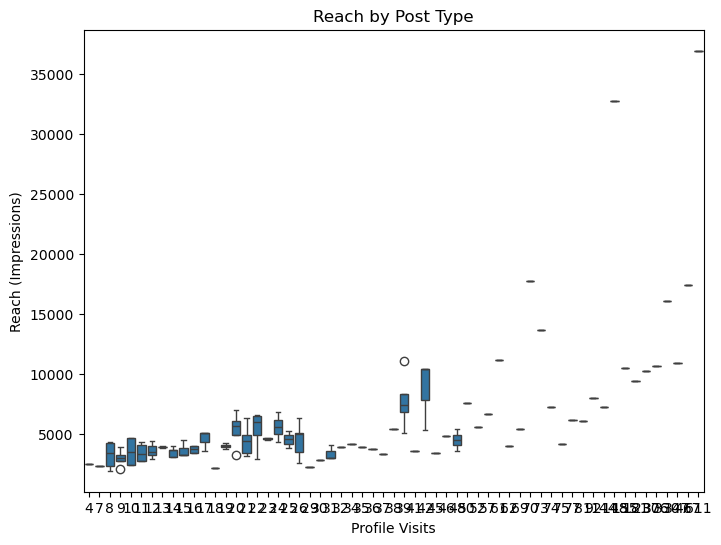

In [15]:
# Analyze trends and patterns in features
# Example 1: Trend of Reach over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Impressions'])
plt.xlabel('Post Index')
plt.ylabel('Reach (Impressions)')
plt.title('Trend of Reach over Time')
plt.show()

# Example 2: Bar chart of Reach from Different Sources
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Analyze correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=['From Home', 'From Hashtags', 'From Explore', 'From Other'],
            y=[df['From Home'].mean(), df['From Hashtags'].mean(), df['From Explore'].mean(), df['From Other'].mean()])
plt.xlabel('Source')
plt.ylabel('Reach')
plt.title('Reach from Different Sources')
plt.show()

# Analyze factors such as post type, time of posting, and content themes
# Example 3: Box plot of Reach by Post Type
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Profile Visits'], y=df['Impressions'])
plt.xlabel('Profile Visits')
plt.ylabel('Reach (Impressions)')
plt.title('Reach by Post Type')
plt.show()




In [16]:
df.index

RangeIndex(start=0, stop=119, step=1)

In [17]:
df.columns

Index(['Username', 'Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Engagement Rate'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Instagram data into a DataFrame
df = pd.read_csv('C:/Users/lenovo/Downloads/Instagram_Reach_Analysis_data.csv', encoding='ISO-8859-1')

# Select the relevant features for prediction
X = df[['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']]
y = df['Impressions']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select and train the machine learning model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
# Use the trained model to predict the reach for new or future posts
new_data = pd.DataFrame({
    'From Home': [10],  # Example value, adjust according to your needs
    'From Hashtags': [5],  # Example value, adjust according to your needs
    'From Explore': [2],  # Example value, adjust according to your needs
    'From Other': [3],  # Example value, adjust according to your needs
    'Saves': [50],  # Example value, adjust according to your needs
    'Comments': [20],  # Example value, adjust according to your needs
    'Shares': [10],  # Example value, adjust according to your needs
    'Likes': [100],  # Example value, adjust according to your needs
    'Profile Visits': [30],  # Example value, adjust according to your needs
    'Follows': [5]  # Example value, adjust according to your needs
})

predicted_reach = model.predict(new_data)
print("Predicted Reach:", predicted_reach)

Mean Squared Error: 15766.226496309311
R-squared: 0.99959404890355
Predicted Reach: [82.23340518]


In [19]:
from sklearn.linear_model import LinearRegression

# Load the Instagram data into a DataFrame
df = pd.read_csv('C:/Users/lenovo/Downloads/instagram_data.csv', encoding='ISO-8859-1')

# Select the relevant features for prediction
X = df[['From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']]
y = df['Impressions']

# Train the machine learning model
model = LinearRegression()
model.fit(X, y)

# Interpret the coefficients or feature importances
coefficients = model.coef_
feature_importances = abs(coefficients) / abs(coefficients).sum()

# Identify the key factors that significantly influence reach
key_factors = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Feature Importance': feature_importances
})
key_factors = key_factors.sort_values(by='Coefficient', ascending=False)

# Print the key factors and their impact on reach

# Recommendations to optimize reach

# 1. Optimize the use of hashtags:
# Based on the impact on reach from hashtags, analyze the hashtags used in successful posts.
# Identify popular and relevant hashtags in the niche and incorporate them strategically.

# 2. Encourage engagement:
# Focus on generating saves, comments, and shares as they positively influence reach.
# Create compelling and shareable content that encourages interaction and discussion among the audience.

# 3. Analyze post types and content themes:
# Explore the impact of different post types (photos, videos) on reach.
# Analyze the performance of various content themes or topics to identify what resonates best with the audience.

# 4. Understand reach from different sources:
# Analyze the reach from different sources such as home, explore, and others.
# Determine the distribution of audience engagement and consider adjusting strategies to target specific sources more effectively.
print(key_factors)

          Feature  Coefficient  Feature Importance
3      From Other     1.083024            0.117865
6          Shares     1.014369            0.110394
2    From Explore     1.007242            0.109618
0       From Home     1.001839            0.109030
1   From Hashtags     0.999318            0.108756
9         Follows     0.502452            0.054682
7           Likes     0.184422            0.020071
8  Profile Visits    -0.197059            0.021446
4           Saves    -0.318018            0.034610
5        Comments    -2.880908            0.313529


In [20]:
df.to_csv(' Instagram_Reach_Analysis_data.csv', index=True)


In [21]:
import pandas as pd

# Load the dataset
df = pd.read_csv(' Instagram_Reach_Analysis_data.csv')

# Sort data by each metric in ascending order
metrics = ['Likes', 'Comments', 'Shares', 'Profile Visits']  # Adjust these to match your actual column names

# Iterate through each metric to display the lowest-performing posts
for metric in metrics:
    sorted_df = df.sort_values(by=metric, ascending=False)
    print(f"\nPosts with the highest {metric} values:")
    print(sorted_df[[ metric, 'Caption', 'Hashtags']].head(5))  # Display top 5 lowest-performing posts

    # Simple recommendation based on sorted order
    print(f"\nRecommendation: To increase {metric}, try using trending hashtags, engaging captions, or posting at optimal times.")




Posts with the highest Likes values:
     Likes                                            Caption  \
117    549  Here are some of the best data science certifi...   
118    443  175 Python Projects with Source Code solved an...   
107    416  Here is a list of 100+ Machine Learning Algori...   
40     416  280 Machine Learning Projects Solved & Explain...   
114    373  Here are some of the best data science certifi...   

                                              Hashtags  
117  #datascience #datasciencejobs #datasciencetrai...  
118  #python #pythonprogramming #pythonprojects #py...  
107  #machinelearning #machinelearningalgorithms #d...  
40   #data #datascience #dataanalysis #dataanalytic...  
114  #datascience #datasciencejobs #datasciencetrai...  

Recommendation: To increase Likes, try using trending hashtags, engaging captions, or posting at optimal times.

Posts with the highest Comments values:
    Comments                                            Caption  \
26      

In [22]:
!pip install tensorflow


In [23]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Sample model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(10,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Create dummy data
X_train = np.random.random((1000, 10))
y_train = np.random.randint(2, size=(1000, 1))

# Train the model
model.fit(X_train, y_train, epochs=5)

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to a .tflite file
with open('recommendation_model.tflite', 'wb') as f:
    f.write(tflite_model)

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='recommendation_model.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare input data (correct shape)
input_data = np.random.random_sample((1, 10)).astype(np.float32)  # Shape (1, 10)

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run the model
interpreter.invoke()

# Get the output
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Model output:", output_data)


C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4732 - loss: 0.6974 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5195 - loss: 0.6910
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5562 - loss: 0.6900
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5565 - loss: 0.6845
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5618 - loss: 0.6846
INFO:tensorflow:Assets written to: C:\Users\lenovo\AppData\Local\Temp\tmpm1ky7x8v\assets


INFO:tensorflow:Assets written to: C:\Users\lenovo\AppData\Local\Temp\tmpm1ky7x8v\assets


Saved artifact at 'C:\Users\lenovo\AppData\Local\Temp\tmpm1ky7x8v'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1553381886480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1553407364368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1553407369744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1553407370704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1553407369936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1553407368784: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model output: [[0.5631611]]


In [24]:
# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to a .tflite file
with open('recommendation_model.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\lenovo\AppData\Local\Temp\tmpp87ppi1c\assets


INFO:tensorflow:Assets written to: C:\Users\lenovo\AppData\Local\Temp\tmpp87ppi1c\assets


Saved artifact at 'C:\Users\lenovo\AppData\Local\Temp\tmpp87ppi1c'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  1553381886480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1553407364368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1553407369744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1553407370704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1553407369936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1553407368784: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [25]:
# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path='recommendation_model.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Prepare input data (dummy input for demonstration)
input_data = np.array(np.random.random_sample((1, 10)), dtype=np.float32)

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Run the model
interpreter.invoke()

# Get the output
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Model output:", output_data)


Model output: [[0.4809278]]


In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv(' Instagram_Reach_Analysis_data.csv')

# Sort the dataset to display unsorted and sorted versions
df_sorted = df.sort_values(by=['Likes', 'Comments', 'Shares', 'Profile Visits'], ascending=False)
df_sorted.to_csv("instagram_data_sorted.csv", index=False)  # Save sorted version

# Display unsorted data
print("Unsorted Data:\n", df.head())

# Display sorted data
print("Sorted Data by Engagement:\n", df_sorted.head())

# Load TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path="recommendation_model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Define example user engagement metrics for prediction (normalized as required)
input_data = np.array([[100, 50, 30, 200]])  # Example placeholder data
input_data = input_data.astype(np.float32)  # Ensure correct data type

# Make prediction
import numpy as np

# Example input with 10 features (replace with your actual feature values)
input_data = np.array([[0.5, 1.2, 0.3, 0.7, 0.1, 0.9, 0.4, 0.6, 0.8, 0.2]], dtype=np.float32)  # Shape should be (1, 10)

# Ensure correct data type
input_data = input_data.astype(np.float32)

# Make prediction
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

print("Prediction Output:", output_data)

# Display recommendation output
recommendation = "Recommended Action: Post more content at peak times and include trending hashtags."
print("Model Prediction (Example Recommendation):", recommendation)


Unsorted Data:
    Unnamed: 0  Impressions  From Home  From Hashtags  From Explore  \
0           0         3920       2586           1028           619   
1           1         5394       2727           1838          1174   
2           2         4021       2085           1188             0   
3           3         4528       2700            621           932   
4           4         2518       1704            255           279   

   From Other  Saves  Comments  Shares  Likes  Profile Visits  Follows  \
0          56     98         9       5    162              35        2   
1          78    194         7      14    224              48       10   
2         533     41        11       1    131              62       12   
3          73    172        10       7    213              23        8   
4          37     96         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Her

In [27]:
prediction_value = output_data[0][0]  # Extracting the scalar value

if prediction_value > 0.7:
    recommendation = "Excellent performance! Keep up the great work!"
elif prediction_value > 0.5:
    recommendation = "Good job! With slight improvements, you can do even better."
else:
    recommendation = "There’s room for improvement. Consider adjusting your strategy."

print("Recommendation:", recommendation)



Recommendation: There’s room for improvement. Consider adjusting your strategy.


In [1]:
import pandas as pd
import numpy as np
import random

# Load the data from the CSV file
file_path = 'C:/Users/lenovo/Downloads/Instagram_Reach_Analysis_data.csv'  # Update this path
df = pd.read_csv(file_path)

# Function to get personalized recommendations and user data
def get_personalized_recommendations(Username):
    # Filter the DataFrame for the specified username
    user_data = df[df['Username'] == Username]
    
    if user_data.empty:
        return f"No data found for the username: {Username}"
    
    # Print user's data
    user_data_summary = user_data[['Likes', 'Comments', 'Shares', 'Profile Visits', 'Hashtags', 'Caption']]
    
    # Get the highest engagement metrics
    highest_likes = user_data['Likes'].max()
    highest_comments = user_data['Comments'].max()
    highest_shares = user_data['Shares'].max()
    
    # Recommendations based on highest metrics
    recommendations = []
    
    # Recommend based on Likes
    if highest_likes > 0:
        recommendations.append("To increase Likes, try using trending hashtags and engaging captions.")
        
    # Recommend based on Comments
    if highest_comments > 0:
        recommendations.append("To increase Comments, consider posting more interactive content or asking questions in your captions.")
        
    # Recommend based on Shares
    if highest_shares > 0:
        recommendations.append("To increase Shares, create content that resonates with your audience and encourages sharing.")
    
    # Generate a random unique recommendation
    unique_recommendations = [
        "Experiment with different posting times to see when your audience is most active.",
        "Engage with your followers through comments and DMs to build a community.",
        "Use a mix of popular and niche hashtags to reach a broader audience.",
        "Analyze your top-performing posts and replicate their success."
    ]
    
    recommendations.append(random.choice(unique_recommendations))
    
    return user_data_summary, "\n".join(recommendations)

# Example usage
Username = input("Enter your Instagram username: ")
user_data_summary, personalized_recommendations = get_personalized_recommendations(Username)

# Print user's data
print(f"\nData for User: {Username}")
print(user_data_summary)

# Print personalized recommendations
print("\nPersonalized Recommendations:")
print(personalized_recommendations)



Enter your Instagram username:  foodie_life



Data for User: foodie_life
   Likes  Comments  Shares  Profile Visits  \
3    213        10       7              23   

                                            Hashtags  \
3  #python #pythonprogramming #pythonprojects #py...   

                                             Caption  
3  Heres how you can write a Python program to d...  

Personalized Recommendations:
To increase Likes, try using trending hashtags and engaging captions.
To increase Comments, consider posting more interactive content or asking questions in your captions.
To increase Shares, create content that resonates with your audience and encourages sharing.
Analyze your top-performing posts and replicate their success.
